In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno 
from vega_datasets import data
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
# importando os dados 
df_diabetes = pd.read_csv('Datasets\diabetes_dataset.csv')
df_diabetes

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\luqui\AppData\Local\Temp\ipykernel_18476\3996510344.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_diabetes = pd.read_csv('Datasets\diabetes_dataset.csv')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# tratamento de dados

# tirando os dados onde skinThickness == 0, glucose == 0, BMI == 0 e BloodPressure == 0, Insulina == 0
df_diabetes = df_diabetes[df_diabetes['SkinThickness'] != 0]
df_diabetes = df_diabetes[df_diabetes['Glucose'] != 0]
df_diabetes = df_diabetes[df_diabetes['BMI'] != 0]
df_diabetes = df_diabetes[df_diabetes['BloodPressure'] != 0]
df_diabetes = df_diabetes[df_diabetes['Insulin'] != 0]

df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Objetivo**
#### Nesta seção, vamos investigar quais variáveis têm maior correlação com o diagnóstico de diabetes. Vamos usar uma matriz de correlação para observar as relações entre as variáveis e identificar aquelas que podem ser mais relevantes para o diagnóstico.

In [6]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


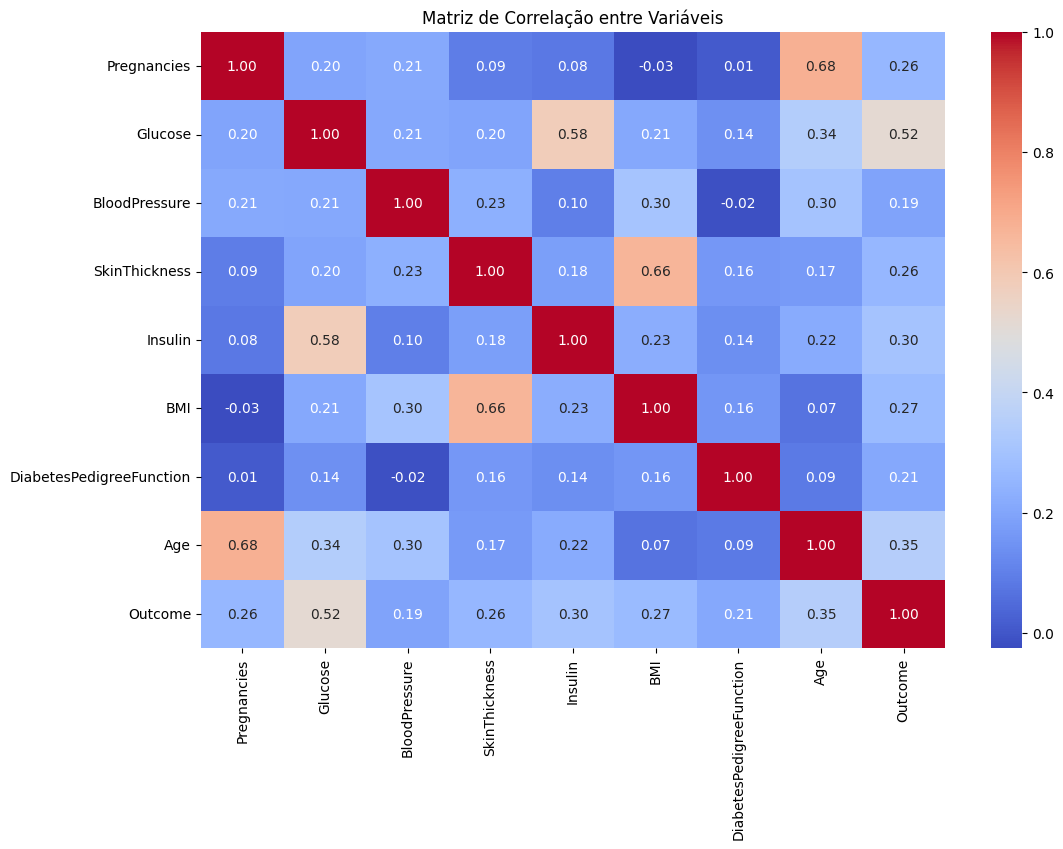

In [7]:
# Matriz de correlação
corr_matrix = df_diabetes.corr()

# Visualização da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

## **Explicação**: Matriz de Correlação entre as variáveis

#### Um gráfico de matriz de correlação é utilizado para observar as correlações entre as variáveis do dataset, sendo **'quadrados' azuis** os que possuem menos correlação entre eles e os **vermelhos** os que possuem mais correlação.

1. **Quadrados 1.0**:
    - Estes quadrados são quadrados que podem ser desconsiderados na análise, pois suas correlações são com eles mesmos, sendo assim, sempre terão a correlação máxima.

2. **Quadrados Laranjas**:
    - Geralmente, os quadrados laranjas, demonstram as correlações mais fortes entre as variáveis de um dataset.

3. **Quadrados Azuis**:
    - Demonstram as correlações mais baixas do dataset.

### Conclusão Geral:
Esse gráfico apresenta as correlações entre as variáveis(colunas) do dataset, sendo assim, podemos observar que as correlações mais fortes são entre:
- `Age` e `Pregnancies`
- `Insulin` e `Glucose`
- `BMI` e `SkinThickness`
- `Glucose` e `Outcome`


## **Objetivo**
#### Neste trecho de código, vamos investigar quais variáveis possuem maior correlação com o nível de glicose, pois essas variáveis podem ser bons preditores. Vamos calcular a matriz de correlação para todas as variáveis e identificar aquelas que mostram uma relação mais forte com a glicose. A correlação será calculada utilizando o método de Pearson, que mede a associação linear entre duas variáveis.

In [8]:
# Verificando dados 
df_diabetes.Glucose.describe()

count    392.000000
mean     122.627551
std       30.860781
min       56.000000
25%       99.000000
50%      119.000000
75%      143.000000
max      198.000000
Name: Glucose, dtype: float64

In [9]:
corr_glicose = corr_matrix['Glucose'].sort_values(ascending=False)
print(corr_glicose)

Glucose                     1.000000
Insulin                     0.581223
Outcome                     0.515703
Age                         0.343641
BloodPressure               0.210027
BMI                         0.209516
SkinThickness               0.198856
Pregnancies                 0.198291
DiabetesPedigreeFunction    0.140180
Name: Glucose, dtype: float64


C:\Users\luqui\AppData\Local\Temp\ipykernel_18476\3908143671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_glicose.index, y=corr_glicose.values, palette='viridis')


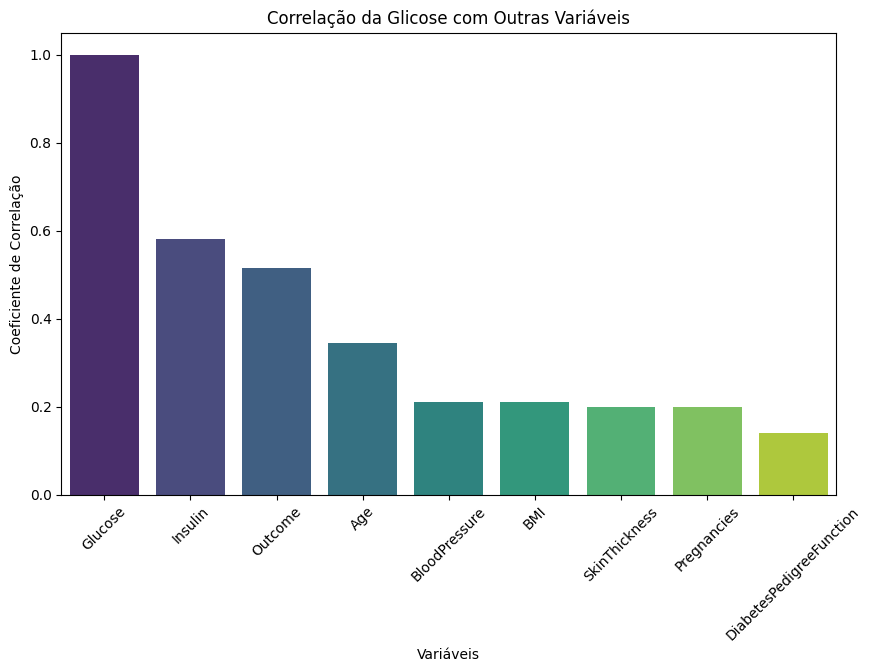

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_glicose.index, y=corr_glicose.values, palette='viridis')

plt.title('Correlação da Glicose com Outras Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Coeficiente de Correlação')

plt.xticks(rotation=45)
plt.show()

## **Resultado**: Correlação entre a Glicose e outras variáveis
### Podemos ver que as maiores correlações em relação a Glicose são a taxa de Insulina e o resultado do exame de diabetes, dito isso, vamos analisar mais afundo estes tópicos...

## Analisando a sua relação com a Insulina

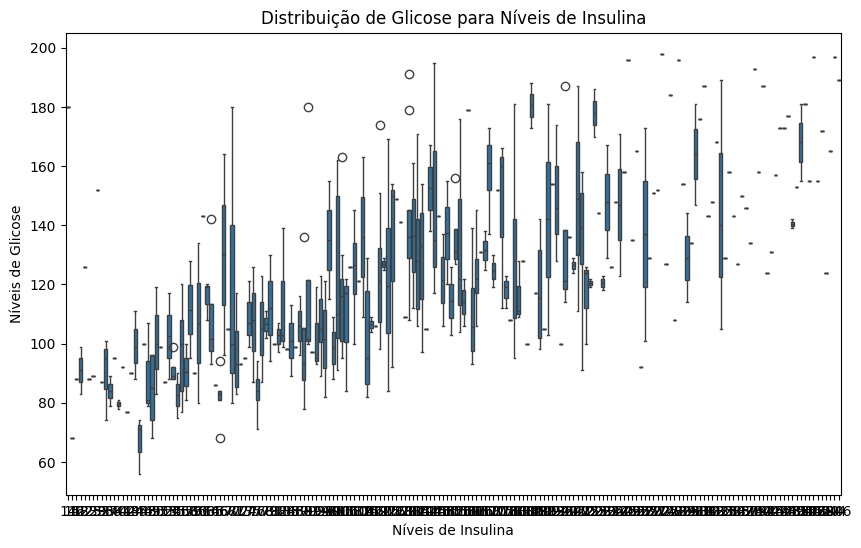

In [43]:
# criando um grafico para visualiação da relação entre a Glicose e a Insulina 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes, x='Insulin', y='Glucose')

plt.title("Distribuição de Glicose para Níveis de Insulina")
plt.xlabel("Níveis de Insulina")
plt.ylabel("Níveis de Glicose")
plt.show()

## **Resultado**
### Como podemos ver neste boxplot, a relação entre os níveis de Glicose e de Insulina são grandezas diretamente proporcionais, ou seja, quanto maior a taxa de Glicose, maior tende a ser a taxa de Insulina também

## Analisando a relação da taxa de Glicose com o resultado de Diabetes

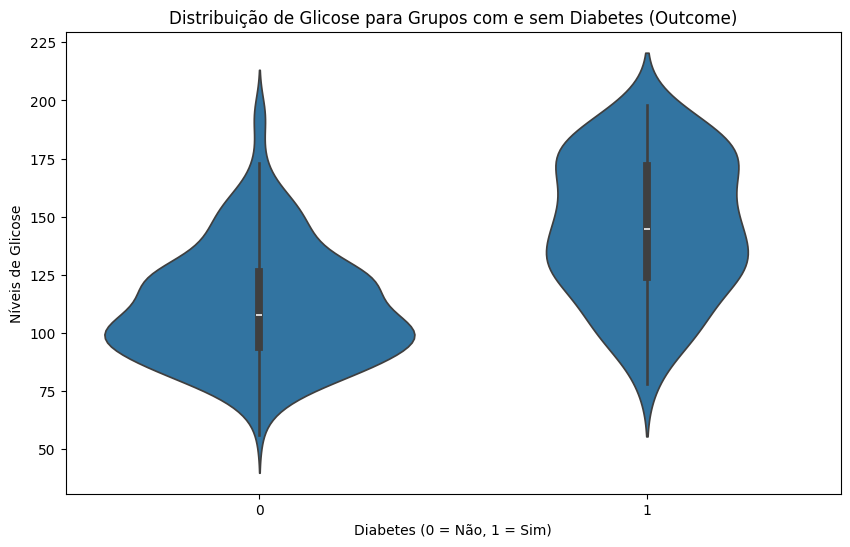

In [42]:
# criando um grafico de violino para comparar a relação entre a Glicose e o Resultado de Diabetes
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_diabetes, x='Outcome', y='Glucose')

plt.title("Distribuição de Glicose para Grupos com e sem Diabetes (Outcome)")
plt.xlabel("Diabetes (0 = Não, 1 = Sim)")
plt.ylabel("Níveis de Glicose")
plt.show()

### Análise do Gráfico de Violino: Distribuição de Glicose por Resultado de Diabetes

O gráfico de violino nos ajuda a visualizar a **distribuição dos níveis de glicose** para cada grupo (`Outcome`), mostrando a variação e a concentração dos valores de glicose entre indivíduos com e sem diabetes.

#### Elementos do Gráfico de Violino:
1. **Eixo X**:
   - O eixo X representa a variável `Outcome`, com:
     - **0** para indivíduos sem diabetes.
     - **1** para indivíduos com diabetes.

2. **Eixo Y**:
   - O eixo Y representa os **níveis de glicose** de cada indivíduo, permitindo observar como esses níveis variam entre os dois grupos.

3. **Formato do Violino**:
   - A forma expandida do "violino" indica onde há maior concentração de dados para os níveis de glicose em cada grupo.
   - Regiões mais largas indicam uma **maior densidade de dados** (mais indivíduos com esses níveis de glicose).
   - A linha central no violino representa a **mediana** da distribuição de glicose em cada grupo.

#### Observações:
1. **Níveis de Glicose por Grupo**:
   - Para o grupo com diabetes (`Outcome = 1`), a distribuição de glicose é deslocada para valores mais altos
   - No grupo sem diabetes (`Outcome = 0`), a distribuição de glicose tende a se concentrar em níveis mais baixos.

2. **Variação e Concentração**:
   - O grupo sem diabetes tem uma distribuição mais estreita e concentrada, indicando que os indivíduos tendem a ter níveis de glicose mais baixos e menos variáveis.
   - O grupo com diabetes mostra uma distribuição mais ampla(violino mais extenso), sugerindo uma maior variação nos níveis de glicose entre indivíduos com diabetes, com muitos indivíduos em níveis altos.

#### Conclusão:
Este gráfico indica que **níveis mais altos de glicose** tendem a estar associados à presença de diabetes. A diferença significativa na distribuição e na mediana dos níveis de glicose entre os grupos com e sem diabetes sugere que a glicose é um forte indicador na distinção entre os dois grupos.


## **Objetivo**
#### Nesta análise, vamos investigar como as variáveis demográficas, como idade, influenciam o diagnóstico de diabetes. A ideia é identificar se há uma associação ou padrão que possa indicar uma maior propensão a diabetes em certos grupos etários ou entre diferentes gêneros.

In [13]:
positivo_diabetes = df_diabetes[df_diabetes['Outcome'] == 1]
negativo_diabetes = df_diabetes[df_diabetes['Outcome'] == 0]

print("Positivo para diabetes: ", "\n", positivo_diabetes.Age.describe(), "\n")
print("Negativo para diabetes: ", "\n", negativo_diabetes.Age.describe())

Positivo para diabetes:  
 count    130.000000
mean      35.938462
std       10.634705
min       21.000000
25%       27.250000
50%       33.000000
75%       43.000000
max       60.000000
Name: Age, dtype: float64 

Negativo para diabetes:  
 count    262.000000
mean      28.347328
std        8.989008
min       21.000000
25%       22.000000
50%       25.000000
75%       30.000000
max       81.000000
Name: Age, dtype: float64


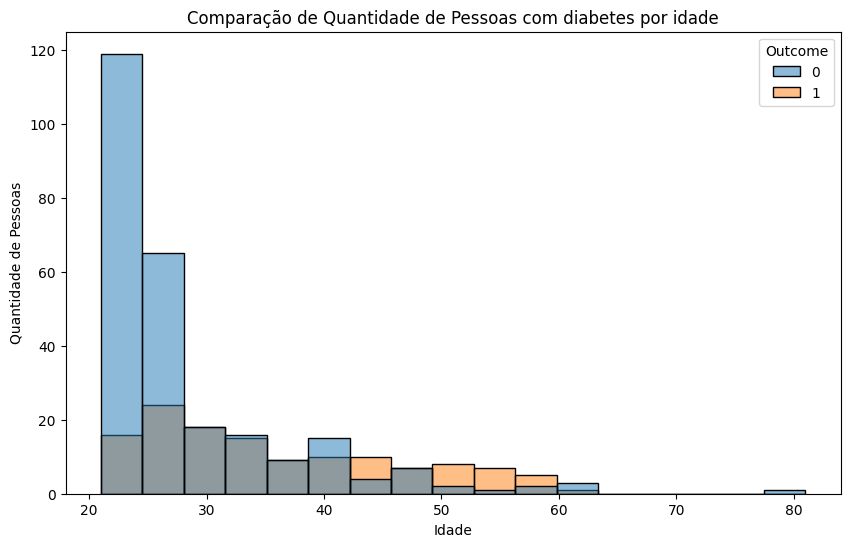

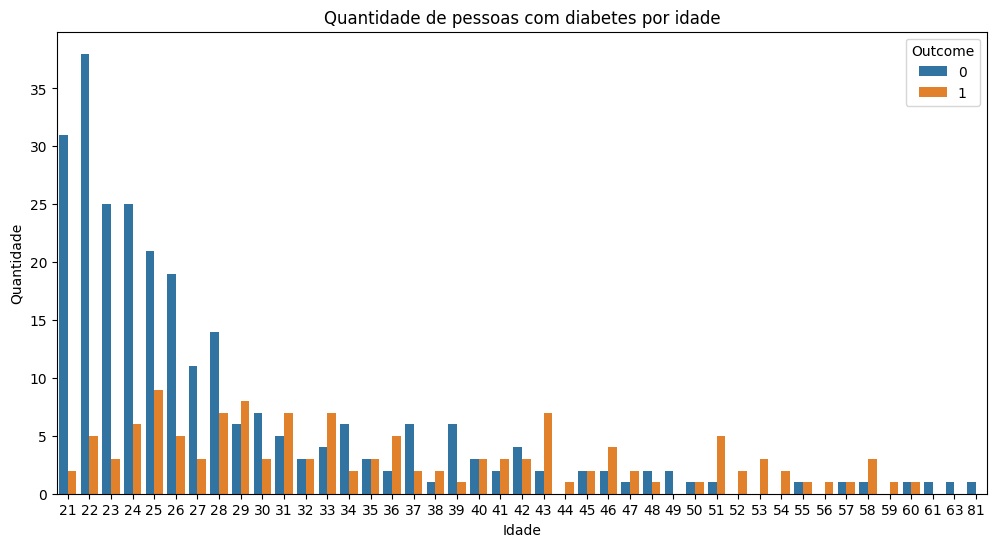

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Outcome', data=df_diabetes)
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Comparação de Quantidade de Pessoas com diabetes por idade')
plt.show()

# Grafico com o seaborn (countplot) para diabetes por Age
# Para o parametro HUE a coluna Outcome precisa ser convertida para string
df_diabetes['Outcome'] = df_diabetes['Outcome'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Outcome', data = df_diabetes)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Quantidade de pessoas com diabetes por idade')
plt.show()

## **Resultado**: Quantidade de Pessoas com diabetes por Idade

#### Estes dois gráficos analisam o mesmo dado, a sua única diferenciação é na visualização dos dados

1. **Gráfico 1**:
    - Este gráfico mostra a distribuição de pessoas em cada faixa etária, sobrepondo (empilhando) as barras, como uma forma de visualização mais dinâmica, observando assim, quais idades possuem um número maior de pessoas com diabetes.

2. **Gráfico 2**:
    - Este gráfico exibe a mesma informação que o Gráfico 1, porém seu diferencial é a maior amplitude de faixas etárias, sendo assim, possuímos o dado mais exato em relação as idades de pessoas com diabetes ou não.

### Conclusão:
Ambos os gráficos exibem os mesmos dados, contanto, o Gráfico 1 tem suas vantagens ao visualizarmos as faixas etárias com mais indivíduos portadores de diabetes, já o Gráfico 2 possui vantagem ao analisarmos exatamente as idades dos indivíduos, ou seja, os gráficos se **completam** em questões de visualização de dados.

## **Objetivo**
#### Verificar a relação de presença de diabetes com o IMC(BMI)

In [15]:
df_diabetes.BMI.describe()

count    392.000000
mean      33.086224
std        7.027659
min       18.200000
25%       28.400000
50%       33.200000
75%       37.100000
max       67.100000
Name: BMI, dtype: float64

In [16]:
df_diabetes['BMI_categoria'] = pd.cut(df_diabetes['BMI'], bins=[0, 18.5, 24.9, 29.9, 50], 
                            labels=['AbaixoDoPeso', 'Normal', 'AcimaDoPeso', 'Obeso'])

df_diabetes['Outcome'] = pd.to_numeric(df_diabetes['Outcome'])

proporcao_diabetes = df_diabetes.groupby('BMI_categoria')['Outcome'].mean()
print(proporcao_diabetes)

BMI_categoria
AbaixoDoPeso    0.000000
Normal          0.045455
AcimaDoPeso     0.211765
Obeso           0.414062
Name: Outcome, dtype: float64


C:\Users\luqui\AppData\Local\Temp\ipykernel_18476\1441837731.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao_diabetes = df_diabetes.groupby('BMI_categoria')['Outcome'].mean()


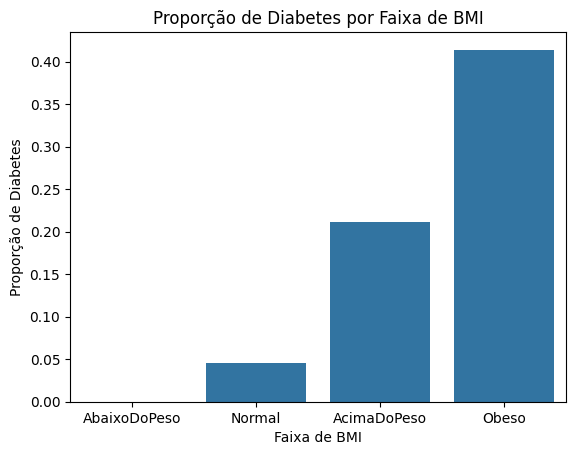

In [17]:
sns.barplot(x=proporcao_diabetes.index, y=proporcao_diabetes.values)
plt.title("Proporção de Diabetes por Faixa de BMI")
plt.xlabel("Faixa de BMI")
plt.ylabel("Proporção de Diabetes")
plt.show()

### **Análise do Gráfico de Barras**: Proporção de Diabetes por Faixa de BMI

Este gráfico de barras mostra a **proporção média de diabetes** para cada categoria de BMI, ou seja, a frequência com que diabetes ocorre dentro de cada faixa de BMI (Abaixo do Peso, Normal, Acima do Peso e Obeso).

#### Elementos do Gráfico:
1. **Eixo X (Faixa de BMI)**:
   - O eixo X representa as categorias de BMI:
     - **AbaixoDoPeso**: BMI inferior a 18.5.
     - **Normal**: BMI entre 18.5 e 24.9.
     - **AcimaDoPeso**: BMI entre 25 e 29.9.
     - **Obeso**: BMI de 30 ou mais.

2. **Eixo Y (Proporção de Diabetes)**:
   - O eixo Y representa a **proporção de indivíduos com diabetes** em cada faixa de BMI, expressa como uma média entre 0 e 1.
   - Essa média foi calculada dividindo o número de pessoas com diabetes pelo total de pessoas em cada faixa de BMI.

3. **Altura das Barras**:
   - A altura de cada barra representa a **proporção média de diabetes** para a faixa de BMI correspondente.
   - Alturas maiores indicam que uma porcentagem maior de indivíduos naquela categoria de BMI apresenta diabetes.

#### Observações:
1. **Tendência Crescente**:
   - Existe uma **tendência clara de aumento na proporção de diabetes** conforme as faixas de BMI aumentam. Pessoas classificadas como "Obeso" têm a maior proporção de diabetes entre as categorias de BMI.

2. **Relação entre BMI e Diabetes**:
   - Indivíduos na faixa de peso **Normal** e **Abaixo do Peso** apresentam as menores proporções de diabetes, enquanto aqueles nas categorias **Acima do Peso** e **Obeso** apresentam proporções significativamente mais altas.
   - Essa tendência sugere que o aumento do BMI pode estar associado a um maior risco de desenvolver diabetes.

3. **Categoria Obeso**:
   - A faixa de BMI "Obeso" tem a maior proporção de diabetes entre as categorias, o que reforça a correlação entre obesidade e a prevalência de diabetes.

#### Conclusão:
Este gráfico sugere uma forte **associação positiva entre o BMI e a probabilidade de diabetes**. Conforme o BMI aumenta, especialmente na faixa de obesidade, a proporção de diabetes também cresce. Esses resultados indicam que o BMI pode ser um fator de risco significativo para diabetes, sendo um dado importante para modelagens preditivas e análises de risco relacionadas ao diabetes.



## Objetivo:
### Analisaremos a relação das Diabetes com as Gravidezes ('Pregnancies')

In [18]:
# Estatisticas descritivas 
df_diabetes.groupby('Outcome')['Pregnancies'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,262.0,2.721374,2.617844,0.0,1.0,2.0,4.0,13.0
1,130.0,4.469231,3.916153,0.0,1.0,3.0,7.0,17.0


**Descrição**: Aqui analisamos estatísticas como média, mediana e desvio padrão do número de gravidezes para os dois grupos (com e sem diabetes). Isso nos ajuda a identificar diferenças básicas na quantidade média de gravidezes entre esses grupos.


C:\Users\luqui\AppData\Local\Temp\ipykernel_18476\4040187627.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Pregnancies', data=df_diabetes, palette="Set1")


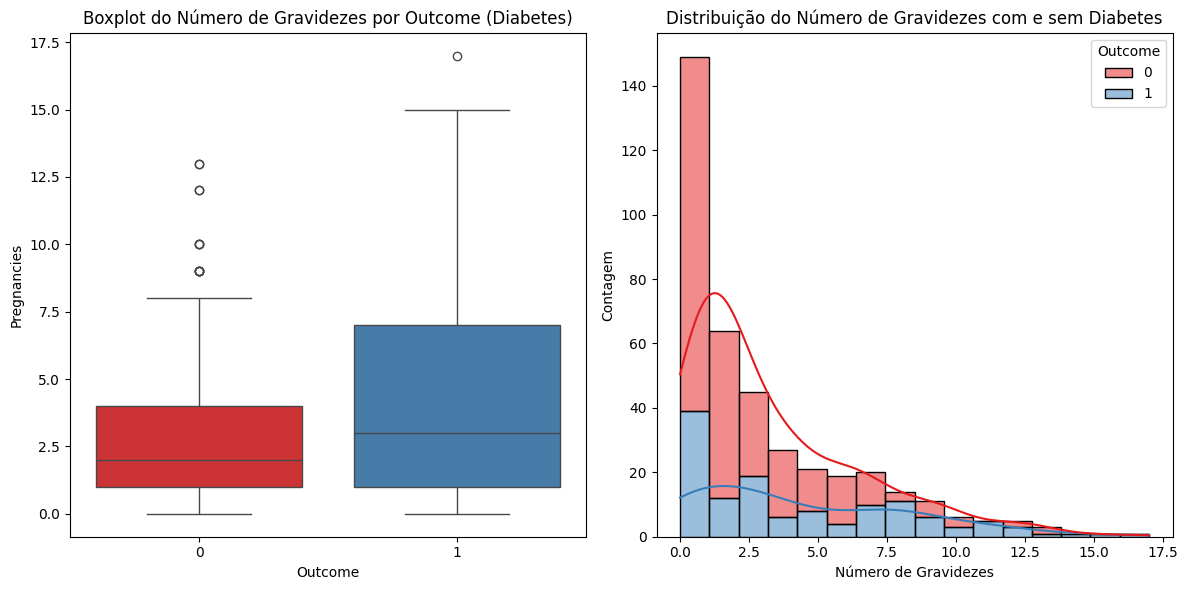

In [19]:
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Outcome', y='Pregnancies', data=df_diabetes, palette="Set1")
plt.title("Boxplot do Número de Gravidezes por Outcome (Diabetes)")

# Histograma
plt.subplot(1, 2, 2)
sns.histplot(data=df_diabetes, x="Pregnancies", hue="Outcome", multiple="stack", kde=True, palette="Set1")
plt.title("Distribuição do Número de Gravidezes com e sem Diabetes")
plt.xlabel("Número de Gravidezes")
plt.ylabel("Contagem")

plt.tight_layout()
plt.show()

### Análise dos Gráficos: Boxplot e Histograma do Número de Gravidezes por Outcome (Diabetes)

#### Gráfico 1: Boxplot do Número de Gravidezes por Outcome

1. **Eixo X**:
   - Representa a variável `Outcome`, onde:
     - **0** indica pessoas sem diabetes.
     - **1** indica pessoas com diabetes.

2. **Eixo Y**:
   - Representa o número de gravidezes (`Pregnancies`), permitindo observar como ele varia entre os grupos com e sem diabetes.

3. **Componentes do Boxplot**:
   - Cada caixa mostra a distribuição interquartílica (do primeiro ao terceiro quartil) do número de gravidezes para cada grupo.
   - A linha no centro da caixa representa a **mediana**, ou seja, o valor central de gravidezes para cada grupo.
   - Os **"bigodes"** se estendem para mostrar a faixa de valores que não são considerados outliers.
   - Pontos fora dos bigodes são **outliers**, representando valores de gravidez excepcionalmente altos.

#### Observações do Boxplot:
- A **mediana** do número de gravidezes é mais alta para o grupo com diabetes (`Outcome = 1`) do que para o grupo sem diabetes (`Outcome = 0`), sugerindo que um número maior de gravidezes pode estar associado a uma maior presença de diabetes.
- O grupo com diabetes também apresenta uma distribuição de gravidezes mais ampla, com valores mais altos e mais outliers em comparação ao grupo sem diabetes.
- A presença de outliers no grupo com diabetes indica que algumas pessoas com diabetes têm um número de gravidezes consideravelmente mais alto

#### Gráfico 2: Histograma da Distribuição do Número de Gravidezes com e sem Diabetes

1. **Eixo X**:
   - Representa o número de gravidezes (`Pregnancies`), agrupando valores em intervalos específicos para mostrar a frequência de cada intervalo.

2. **Eixo Y**:
   - Representa a contagem de pessoas em cada intervalo de número de gravidezes.

3. **Hues por Outcome**:
   - O gráfico diferencia as distribuições de pessoas com e sem diabetes, empilhando as barras para mostrar a proporção de ambos os grupos.
   - A curva **KDE** (kernel density estimation) adiciona uma linha de suavização, mostrando a densidade aproximada de cada grupo.

#### Observações do Histograma:
- Pessoas sem diabetes (`Outcome = 0`) são mais concentradas em valores mais baixos de gravidezes (entre 0 e 3 gravidezes).
- A frequência de pessoas com diabetes (`Outcome = 1`) tende a aumentar para valores mais altos de gravidezes, e elas parecem mais distribuídas ao longo de um intervalo mais amplo, se comparadas ao grupo sem diabetes.
- A presença de diabetes se torna mais comum em mulheres com um número maior de gravidezes, o que corrobora a tendência observada no boxplot.

### Conclusão Geral:
Esses gráficos sugerem que um maior número de gravidezes está associado à presença de diabetes. Isso é indicado tanto pela mediana mais alta e os valores superiores no boxplot para o grupo com diabetes, quanto pela distribuição observada no histograma. Esses insights indicam que o número de gravidezes pode ser um fator relevante na análise de risco de diabetes e que poderia ser considerado em uma modelagem preditiva.



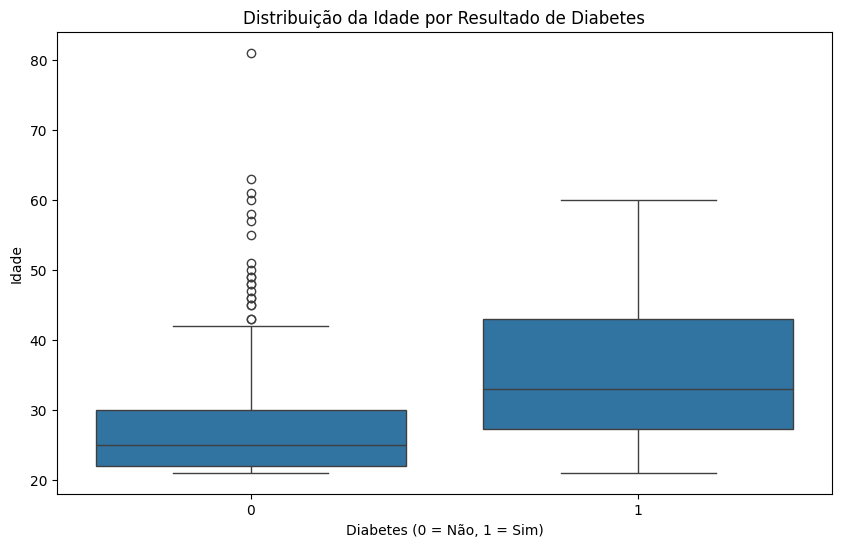

In [20]:
# Visualizando o boxplot em relação a idade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df_diabetes)
plt.title('Distribuição da Idade por Resultado de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

### Gráfico: Distribuição da Idade por Resultado de Diabetes

Este gráfico apresenta a relação entre a variável `Age` (idade) e a variável de resultado `Outcome` (presença de diabetes), onde utilizamos o modelo de BoxPlot para visualização dos dados de uma maneira geral.

#### Elementos do Gráfico:
1. **Eixo X**:
   - O eixo X indica o resultado dos diagnósticos de diabetes, a variável `Outcome`, sendo 0, um não portador de diabetes e 1 um portador.

2. **Eixo Y**:
   - O eixo Y indica a variável `Age`(idade) por números inteiros.

3. **Componentes do Boxplot**:
   - Cada caixa representa a **distribuição interquartílica** (ou seja, do primeiro ao terceiro quartil) da idade para cada grupo.
   - A linha no centro de cada caixa é a **mediana** da idade, indicando o valor central da idade para cada grupo.
   - Os **"bigodes"** do boxplot se estendem para mostrar a faixa de idade que não é considerada um outlier (valores extremos).
   - Os pontos fora dos bigodes indicam **outliers** – idades que estão significativamente acima ou abaixo do restante dos dados para aquele grupo.

#### Observações:
1. **Média e Mediana de Idade**:
   - A mediana da idade no grupo com diabetes (`Outcome = 1`) parece ser ligeiramente maior do que no grupo sem diabetes (`Outcome = 0`). Isso indica que, em média, pessoas com diabetes tendem a ser um pouco mais velhas que as sem diabetes.

2. **Amplitude da Idade**:
   - A faixa de idade é maior para o grupo com diabetes, sugerindo que pessoas com diabetes podem estar presentes em uma faixa etária mais ampla em comparação ao grupo sem diabetes.

3. **Outliers**:
   - Podemos observar outliers em ambos os grupos. Esses outliers representam indivíduos que estão bem fora da faixa normal de idade para cada grupo, como pessoas muito jovens ou muito idosas com diabetes. Esses pontos podem indicar casos excepcionais ou valores que precisam de análise adicional.

#### Conclusão:
- Esse boxplot sugere que há uma diferença sutil na idade entre os grupos com e sem diabetes, com o grupo de pessoas com diabetes tendendo a ser mais velho em média.
- Essa visualização inicial suporta a ideia de que a idade pode ter uma influência na predisposição ao diabetes, mas essa tendência não é muito acentuada, indicando que outros fatores também podem ter papéis significativos.

Esse boxplot nos fornece uma visão geral útil para seguir com análises mais detalhadas ou com modelagens, como a regressão linear, para entender melhor essa relação.

In [21]:
# Separando as variáveis independente e dependente
X = df_diabetes[['Age']]
y = df_diabetes['Outcome']

# Dividindo os dados em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Previsão no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliando o modelo
print(f'Coeficiente de Idade: {regressor.coef_[0]}')

Coeficiente de Idade: 0.01678004295393965


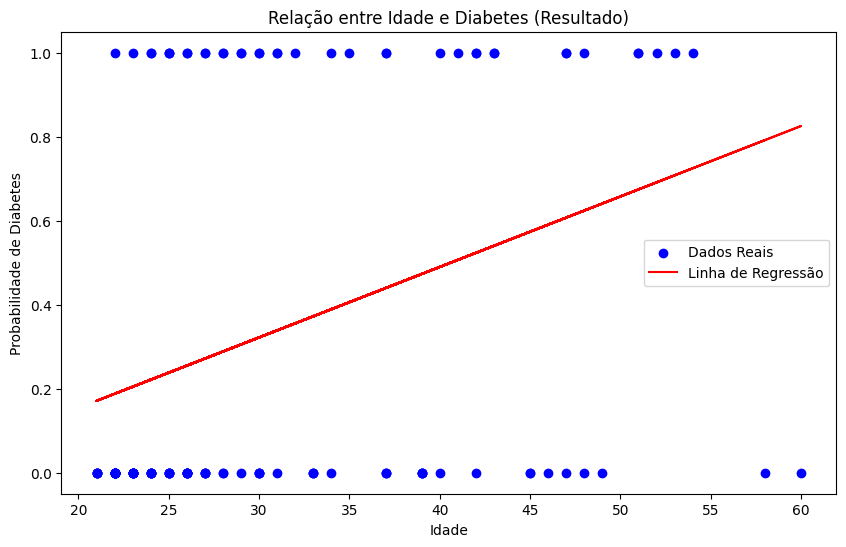

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', label='Linha de Regressão')
plt.title('Relação entre Idade e Diabetes (Resultado)')
plt.xlabel('Idade')
plt.ylabel('Probabilidade de Diabetes')
plt.legend()
plt.show()

### Gráfico: Relação entre Idade e Probabilidade de Diabetes

Este gráfico apresenta a relação entre a variável `Age` (idade) e a variável de resultado `Outcome` (presença de diabetes), onde utilizamos a **regressão linear** para tentar modelar essa relação.

#### Elementos do Gráfico:
1. **Pontos Azuis (Dados Reais)**:
   - As bolinhas azuis representam as observações reais do conjunto de teste. Cada ponto azul mostra uma idade específica (no eixo X) e o resultado real de diabetes (no eixo Y), onde `0` indica ausência de diabetes e `1` indica presença de diabetes. Esses pontos refletem os dados verdadeiros, ou seja, as idades das pessoas e se elas têm ou não diabetes.

2. **Linha Vermelha (Linha de Regressão)**:
   - A linha vermelha representa o modelo de regressão linear ajustado sobre os dados de treinamento. Ela mostra a tendência estimada da probabilidade de diabetes em função da idade, ou seja, como a idade pode estar associada ao aumento ou diminuição na probabilidade de diabetes.
   - A inclinação da linha ajuda a visualizar se há uma correlação positiva ou negativa entre idade e diabetes. Uma linha ascendente sugeriria que a probabilidade de diabetes aumenta com a idade.

#### Interpretação Geral:
- Este gráfico fornece uma visualização inicial da influência da idade no desenvolvimento de diabetes. Se a linha de regressão tem uma inclinação positiva (para cima), isso indica uma associação positiva entre idade e diabetes, sugerindo que, conforme a idade aumenta, também aumenta a probabilidade de diabetes.
- No entando a variável `Outcome` é uma variável binária (0 ou 1), sendo assim a regressão linear pode não trazer os melhores resultados em questões de diagnóstico de diabetes.


## **Objetivo**
### Utilizando o RandomForest, visamos fazer um modelo de ML que preve os casos de diabete com base nos dados oferecidos a ele 

In [23]:
df_diabetes = df_diabetes.drop('BMI_categoria', axis=1)

In [41]:
# creating, training and testing 
model = RandomForestClassifier()

X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# training the model 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7288135593220338

In [26]:
# tentando prever novos resultados 

new_data = pd.DataFrame({'Pregnancies': [0], 
                         'Glucose': [90], 
                         'BloodPressure': [60], 
                         'SkinThickness': [14], 
                         'Insulin': [70], 
                         'BMI': [23.84], 
                         'DiabetesPedigreeFunction': [0.1], 
                         'Age': [19]})

prediction = model.predict(new_data)
prediction

array([0])

### Análise do Código: Modelo de Classificação com Random Forest

O código acima implementa um modelo de **classificação** usando o **Random Forest Classifier** para prever o resultado de diabetes (`Outcome`) com base em diversas variáveis de entrada presentes no dataset `df_diabetes`.

#### Etapas do Código

1. **Definição do Modelo**:
   ```python
   model = RandomForestClassifier()

2. **Divisão das Variáveis Independente(X) e Dependente(Y)**:
   ```python
   X = df_diabetes.drop('Outcome', axis=1)
   y = df_diabetes['Outcome']

3. **Divisão de Treino e Teste**:
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. **Treinamento**:
   ```python
   model.fit(X_train, y_train)

5. **Predição do conjunto de Teste**:
   ```python
   y_pred = model.predict(X_test)

6. **Cálculo de Acurácia**:
   ```python
   accuracy = accuracy_score(y_test, y_pred)

7. **Predição com Novos Dados**:
   ```python
   new_data = pd.DataFrame({'Pregnancies': [0], 
                         'Glucose': [90], 
                         'BloodPressure': [60], 
                         'SkinThickness': [14], 
                         'Insulin': [70], 
                         'BMI': [23.84], 
                         'DiabetesPedigreeFunction': [0.1], 
                         'Age': [19]})

prediction = model.predict(new_data)

### Conclusão
Este código demonstra um exemplo completo de construção, treinamento e avaliação de um modelo de classificação com `Random Forest`. Ele também mostra como usar o modelo treinado para fazer previsões em novos dados.

In [31]:
df_assinaturas = pd.read_csv('Datasets/gym_members_exercise_tracking.csv')
df_assinaturas.dropna()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


Objetivo

Este código tem como objetivo analisar como a frequência de treino semanal (dias por semana) influencia outros fatores de retenção dos usuários, como calorias queimadas, duração da sessão e ingestão de água.

Primeiramente, ele seleciona as colunas numéricas do conjunto de dados df_assinaturas, adicionando a coluna 'Workout_Frequency (days/week)'. Em seguida, os dados são agrupados pela frequência de treino, calculando a média de cada variável numérica para cada frequência. Finalmente, o código cria um gráfico para visualizar a relação entre a frequência de treino e esses fatores, permitindo identificar possíveis correlações entre a retenção e as variáveis de saúde dos usuários.

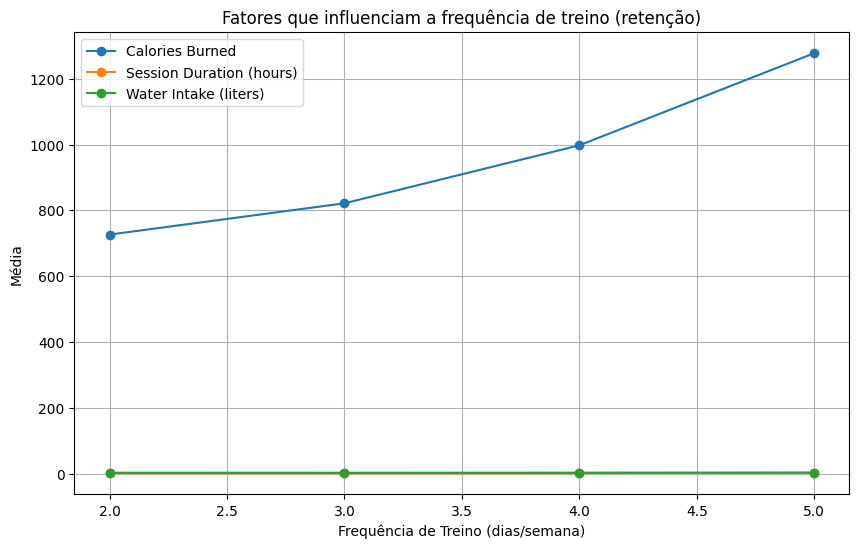

In [32]:
# Selecionar apenas as colunas numéricas
colunas_num = df_assinaturas.select_dtypes(include=['float64', 'int64'])

# Adicionar a coluna 'Workout_Frequency (days/week)' ao conjunto de dados numérico
colunas_num['Workout_Frequency (days/week)'] = df_assinaturas['Workout_Frequency (days/week)']

# Agrupar os dados pela frequência de treino e calcular a média das colunas numéricas
influencia_retencao = colunas_num.groupby('Workout_Frequency (days/week)').mean()

# Criar gráfico para analisar a retenção (frequência de treino) em relação a outros fatores
plt.figure(figsize=(10, 6))

# Plotar diferentes variáveis em relação à frequência de treino
plt.plot(influencia_retencao.index, influencia_retencao['Calories_Burned'], label='Calories Burned', marker='o')
plt.plot(influencia_retencao.index, influencia_retencao['Session_Duration (hours)'], label='Session Duration (hours)', marker='o')
plt.plot(influencia_retencao.index, influencia_retencao['Water_Intake (liters)'], label='Water Intake (liters)', marker='o')

# exibindo o gráfico
plt.title('Fatores que influenciam a frequência de treino (retenção)')
plt.xlabel('Frequência de Treino (dias/semana)')
plt.ylabel('Média')
plt.legend()
plt.grid(True)
plt.show()

Análise do Gráfico

O gráfico apresenta a média de diferentes variáveis em função da frequência de treino semanal, indicando como fatores de retenção, como calorias queimadas, duração da sessão e ingestão de água, se relacionam com a regularidade de treino dos usuários. Cada linha no gráfico representa uma dessas variáveis e mostra como seu valor médio varia conforme a frequência de treino (dias por semana). Essa visualização permite identificar tendências, como o aumento de calorias queimadas e duração da sessão em treinos mais frequentes, o que sugere um impacto direto da consistência dos treinos nesses fatores de retenção.

Conclusão

A análise indica que a frequência de treino semanal está positivamente relacionada a fatores como calorias queimadas e duração da sessão, sugerindo que usuários com maior frequência de treino mantêm um nível mais alto de engajamento em atividades físicas. Esse padrão pode indicar que a regularidade no treino é um fator de retenção importante, pois usuários mais frequentes tendem a manter hábitos que os incentivam a permanecer ativos.








Objetivo

Este código tem como objetivo identificar o perfil típico dos membros mais engajados em relação à frequência de treino, considerando apenas aqueles que treinam cinco ou mais dias por semana. A análise é realizada para entender como variáveis como idade, peso, percentual de gordura, calorias queimadas, duração da sessão, ingestão de água e nível de experiência diferem entre os gêneros, fornecendo insights sobre o perfil dos membros mais ativos.

Primeiro, o código filtra o conjunto de dados df_assinaturas para selecionar apenas membros com alta frequência de treino. Em seguida, ele seleciona colunas relevantes para o perfil dos usuários e agrupa os dados por gênero, calculando a média dessas variáveis para comparar homens e mulheres. O gráfico gerado mostra as médias dessas características, facilitando a visualização das diferenças e similaridades entre os perfis dos membros mais engajados.

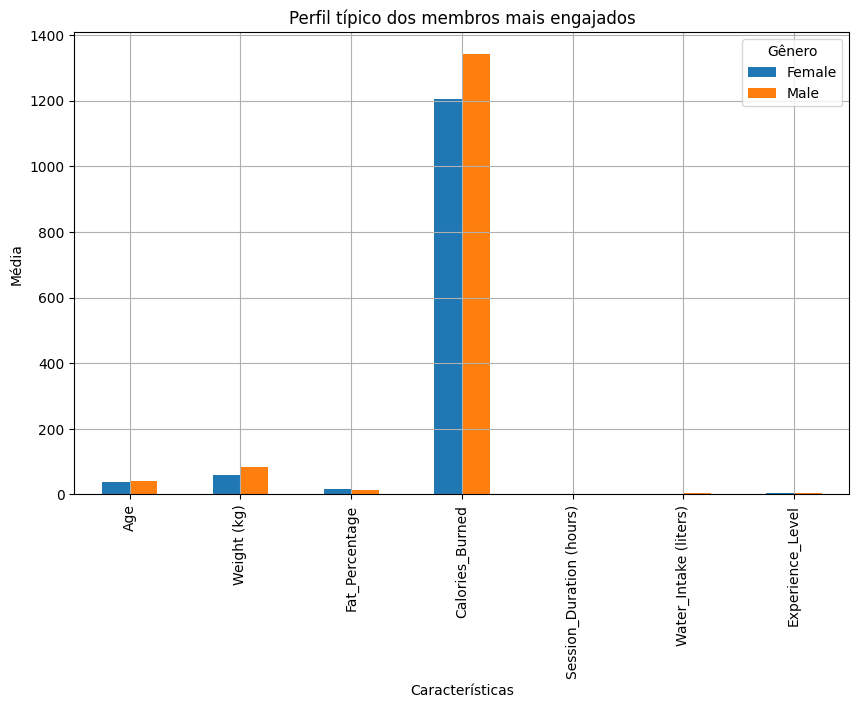

In [33]:
# Filtrar membros com alta frequência de treino (5 ou mais dias por semana)
membros_engajados = df_assinaturas[df_assinaturas['Workout_Frequency (days/week)'] >= 5]

# Selecionar colunas relevantes para o perfil
perfil = ['Age', 'Weight (kg)', 'Fat_Percentage', 'Calories_Burned', 'Session_Duration (hours)', 'Water_Intake (liters)', 'Experience_Level']

# Agrupar os dados por gênero para visualizar diferenças entre homens e mulheres
perfil_engajado = membros_engajados.groupby('Gender')[perfil].mean()

# Criar gráfico para mostrar o perfil típico
perfil_engajado.T.plot(kind='bar', figsize=(10, 6))  # Transpor para que as características fiquem no eixo x

# Montando o gráfico
plt.title('Perfil típico dos membros mais engajados')
plt.xlabel('Características')
plt.ylabel('Média')
plt.legend(title='Gênero')
plt.grid(True)
plt.show()

Análise do Gráfico

O gráfico de barras compara diferentes características dos membros com alta frequência de treino, separando as médias de cada variável por gênero. As barras indicam valores médios para idade, peso, percentual de gordura, calorias queimadas, duração das sessões, ingestão de água e nível de experiência para homens e mulheres. Essa estrutura permite identificar padrões distintos entre os gêneros, como possíveis variações na quantidade de calorias queimadas ou na duração das sessões, refletindo diferenças no comportamento de treino e nos atributos físicos de cada grupo.

Conclusão

A análise indica que membros mais engajados, definidos como aqueles que treinam cinco ou mais dias por semana, apresentam perfis distintos entre homens e mulheres em termos de variáveis físicas e comportamentais. Esses resultados podem ajudar a adaptar programas de treino e orientações de acordo com as necessidades e características dos usuários, incentivando uma abordagem mais personalizada e potencialmente aumentando o engajamento e a retenção de membros.

Objetivo

Este código visa identificar a relação entre a frequência de treino dos membros e a probabilidade de cancelamento de sua assinatura. Para isso, ele cria uma coluna chamada 'Cancelamento_Prob' que sinaliza membros com uma frequência de treino menor que duas vezes por semana como de alto risco de cancelamento. Em seguida, o código conta a quantidade de membros em risco de cancelamento (baixa frequência) e aqueles engajados (alta frequência) e gera um gráfico de barras para ilustrar essa distribuição.

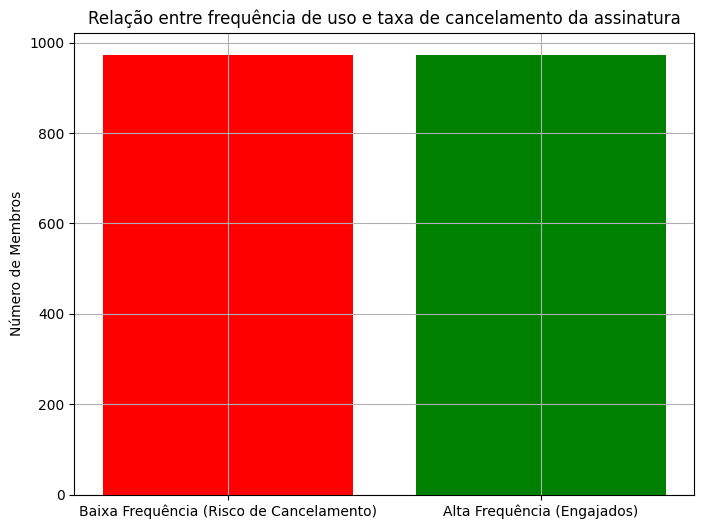

In [34]:
# Criar uma coluna indicando a probabilidade de cancelamento baseada na frequência de treino
df_assinaturas['Cancelamento_Prob'] = df_assinaturas['Workout_Frequency (days/week)'] < 2

# Contar o número de membros que têm alta ou baixa frequência de treino
cancelamento = df_assinaturas['Cancelamento_Prob'].value_counts()

# Criar gráfico para mostrar a relação entre frequência de uso e cancelamento
plt.figure(figsize=(8, 6))

# Plotar gráfico de barras
plt.bar(['Baixa Frequência (Risco de Cancelamento)', 'Alta Frequência (Engajados)'], cancelamento, color=['red', 'green'])

# Montando o gráfico
plt.title('Relação entre frequência de uso e taxa de cancelamento da assinatura')
plt.ylabel('Número de Membros')
plt.grid(True)
plt.show()

Análise do Gráfico

O gráfico de barras mostra o número de membros classificados em duas categorias: aqueles com baixa frequência de treino, considerados em risco de cancelamento, e os membros engajados, com alta frequência de treino. A barra vermelha representa o grupo de baixa frequência, enquanto a verde representa o grupo mais ativo, permitindo uma análise visual clara da diferença entre os dois grupos em termos de engajamento e potencial retenção.

Conclusão

A análise revela que a frequência de treino tem uma correlação direta com o risco de cancelamento da assinatura. Membros que treinam com menor regularidade apresentam maior probabilidade de cancelar, destacando a importância de incentivar a frequência de uso como estratégia para aumentar a retenção. Essa informação pode ser usada para desenvolver intervenções voltadas a manter os usuários ativos e engajados.

Objetivo

Este código tem como objetivo explorar a relação entre o tempo de assinatura (em meses) e a frequência de treino dos usuários. Primeiro, uma coluna fictícia é criada para simular o tempo de assinatura em meses, com valores aleatórios entre 1 e 36. Em seguida, calcula-se a correlação entre o tempo de assinatura e a frequência de treino semanal, e essa relação é visualizada em um gráfico de dispersão com uma linha de tendência para melhor compreensão.

Correlação entre tempo de assinatura e frequência de treino: 0.01


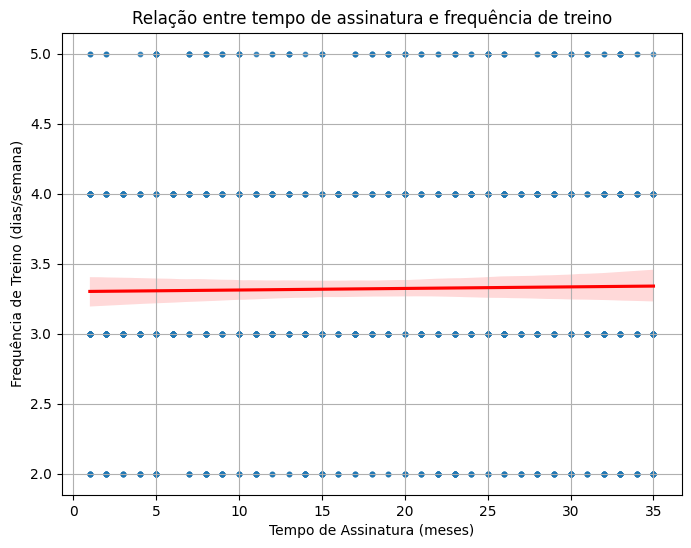

In [35]:
# Suposição: Criar uma coluna fictícia de tempo de assinatura em meses
np.random.seed(42)  # Para reprodução dos dados fictícios
df_assinaturas['Subscription_Length (months)'] = np.random.randint(1, 36, size=len(df_assinaturas))  # Exemplo: entre 1 e 36 meses

# Calcular a correlação entre tempo de assinatura e frequência de treino
correlacao_tempo_frequencia = df_assinaturas['Subscription_Length (months)'].corr(df_assinaturas['Workout_Frequency (days/week)'])

# Exibir a correlação
print(f"Correlação entre tempo de assinatura e frequência de treino: {correlacao_tempo_frequencia:.2f}")

# Criar gráfico para visualizar a relação
plt.figure(figsize=(8, 6))
sns.regplot(x='Subscription_Length (months)', y='Workout_Frequency (days/week)', data=df_assinaturas, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relação entre tempo de assinatura e frequência de treino')
plt.xlabel('Tempo de Assinatura (meses)')
plt.ylabel('Frequência de Treino (dias/semana)')
plt.grid(True)
plt.show()

Análise do Gráfico

O gráfico de dispersão mostra a relação entre o tempo de assinatura dos usuários e sua frequência de treino. Cada ponto representa um membro, posicionando o tempo de assinatura no eixo x e a frequência de treino no eixo y. A linha de tendência vermelha indica a direção e a força da relação entre essas variáveis, facilitando a identificação de possíveis padrões, como um aumento na frequência de treino para membros com assinaturas de maior duração.

Conclusão

A correlação calculada e o gráfico de dispersão sugerem uma possível relação entre o tempo de assinatura e a frequência de treino. Caso a correlação seja positiva, isso indica que os usuários com assinaturas mais longas tendem a manter uma frequência de treino mais alta, refletindo maior engajamento. Essa informação pode auxiliar no desenvolvimento de estratégias para incentivar tanto a frequência quanto a renovação das assinaturas, visando maior retenção e engajamento dos usuários.

Objetivo

Este código investiga se existe uma relação linear entre o tempo de assinatura (em meses) e a frequência de treino (dias por semana). A regressão linear é aplicada para quantificar essa relação e identificar se a duração do compromisso com o serviço influencia o engajamento em atividades físicas.

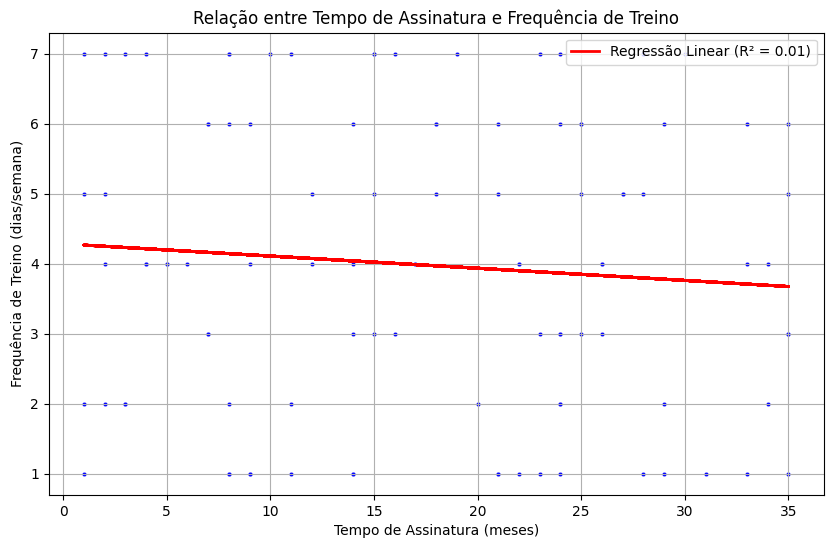

Coeficiente de Determinação (R²): 0.01


In [40]:
# Criar uma coluna fictícia de tempo de assinatura em meses
np.random.seed(42)
df_assinaturas = pd.DataFrame({
    'Subscription_Length (months)': np.random.randint(1, 36, 100),
    'Workout_Frequency (days/week)': np.random.randint(1, 8, 100)
})

# Aplicação da regressão linear
X = df_assinaturas[['Subscription_Length (months)']]
y = df_assinaturas['Workout_Frequency (days/week)']

# Criar o modelo de regressão linear
linear_model = LinearRegression()
linear_model.fit(X, y)

# Previsão e cálculo do coeficiente de determinação (R²)
y_pred = linear_model.predict(X)
r2 = r2_score(y, y_pred)

# Plotar os dados e a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subscription_Length (months)', y='Workout_Frequency (days/week)', data=df_assinaturas, s=10, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regressão Linear (R² = {r2:.2f})')
plt.title('Relação entre Tempo de Assinatura e Frequência de Treino')
plt.xlabel('Tempo de Assinatura (meses)')
plt.ylabel('Frequência de Treino (dias/semana)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Análise do Gráfico e Resultado da Regressão

O gráfico mostra os dados de dispersão com uma linha de regressão linear ajustada em vermelho. O baixo valor de R² (0,01) indica uma relação muito fraca entre as variáveis. Isso sugere que o tempo de assinatura não tem um impacto significativo na frequência de treino dos usuários.

Conclusão

Com base no valor de R², concluímos que o tempo de assinatura, pelo menos neste conjunto de dados, não é um preditor confiável para a frequência de treino. Essa informação pode ser útil para a equipe, que pode optar por explorar outros fatores para incentivar o engajamento dos usuários com o serviço. ​

Objetivo

Este código tem como objetivo analisar a adesão e a manutenção de assinaturas de um serviço entre diferentes faixas etárias. Primeiro, ele divide os usuários em grupos etários predefinidos e calcula a taxa de adesão, que é o número de membros em cada faixa etária, e a taxa de manutenção, definida como o tempo médio de assinatura por grupo. Esses dados são então apresentados em um gráfico de barras comparativo, onde o eixo x exibe as faixas etárias, permitindo uma análise visual das tendências de adesão e manutenção entre diferentes idades.

Taxa de Adesão por Faixa Etária:
Age_Group
18-24    164
25-34    211
35-44    241
45-54    242
55-64     88
65+        0
Name: count, dtype: int64

Taxa de Manutenção (Tempo de Assinatura Médio) por Faixa Etária:
Age_Group
18-24    17.951220
25-34    19.066351
35-44    18.029046
45-54    19.012397
55-64    17.886364
65+            NaN
Name: Subscription_Length (months), dtype: float64


C:\Users\luqui\AppData\Local\Temp\ipykernel_18476\2144627161.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_maintenance = df_assinaturas.groupby('Age_Group')['Subscription_Length (months)'].mean()


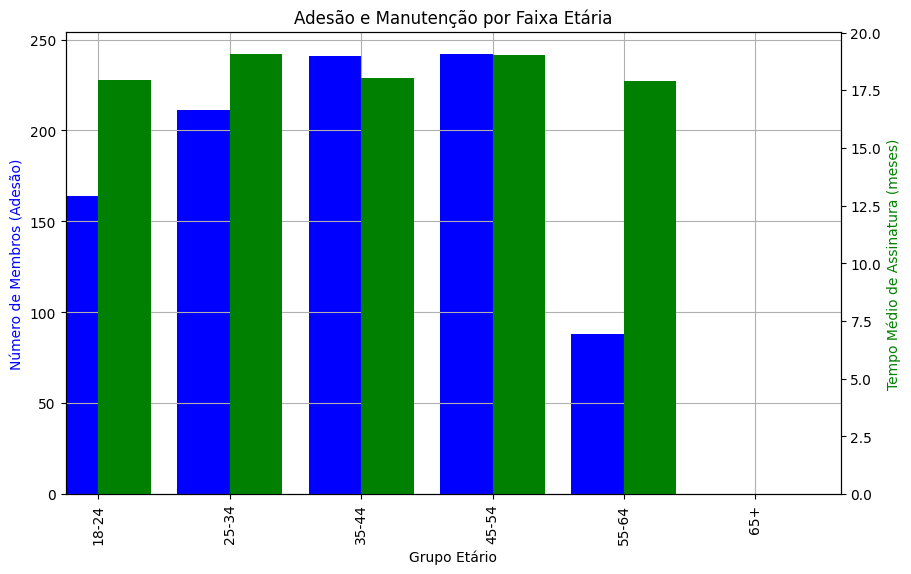

In [37]:
# Criar faixas etárias
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_assinaturas['Age_Group'] = pd.cut(df_assinaturas['Age'], bins=bins, labels=labels)

# Parte 1: Taxa de adesão (contagem de membros por faixa etária)
age_group_adhesion = df_assinaturas['Age_Group'].value_counts().sort_index()

# Parte 2: Taxa de manutenção (média de tempo de assinatura por faixa etária)
age_group_maintenance = df_assinaturas.groupby('Age_Group')['Subscription_Length (months)'].mean()

# Exibir os dados de adesão e manutenção
print("Taxa de Adesão por Faixa Etária:")
print(age_group_adhesion)
print("\nTaxa de Manutenção (Tempo de Assinatura Médio) por Faixa Etária:")
print(age_group_maintenance)

# Gráfico para comparar adesão e manutenção por faixa etária
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar a taxa de adesão (número de membros) por faixa etária
age_group_adhesion.plot(kind='bar', color='blue', ax=ax1, width=0.4, position=1, label='Adesão (Número de Membros)')
ax1.set_xlabel('Grupo Etário')
ax1.set_ylabel('Número de Membros (Adesão)', color='blue')

# Plotar a taxa de manutenção (tempo médio de assinatura) por faixa etária
ax2 = ax1.twinx()
age_group_maintenance.plot(kind='bar', color='green', ax=ax2, width=0.4, position=0, label='Manutenção (Tempo de Assinatura)')
ax2.set_ylabel('Tempo Médio de Assinatura (meses)', color='green')

plt.title('Adesão e Manutenção por Faixa Etária')
ax1.grid(True)
plt.show()

Análise do Gráfico

O gráfico apresenta a comparação entre a adesão (número de membros) e a manutenção (tempo médio de assinatura) por faixa etária. A barra azul representa o número de membros em cada grupo etário, enquanto a barra verde mostra o tempo médio de assinatura desses grupos. Isso facilita a visualização das diferenças de adesão e retenção entre as idades, destacando faixas etárias com maior número de membros e aquelas com maior comprometimento de longo prazo.

Conclusão

A análise mostra que a adesão e o tempo médio de assinatura variam conforme a faixa etária, sugerindo que certos grupos etários são mais propensos a aderir ao serviço ou a manter uma assinatura por mais tempo. Esse padrão pode orientar estratégias direcionadas para aumentar a adesão entre grupos menos representados ou incentivar a retenção em faixas com tempo médio de assinatura mais curto. Essa compreensão detalhada ajuda a adaptar o serviço para atender melhor os interesses e necessidades específicas de cada faixa etária.